In [1]:
import sqlite3, string
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.pipeline import Pipeline
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('prods.db')
products = pd.read_sql("SELECT * FROM products", con)

products.drop_duplicates(inplace=True)
products.dropna(inplace=True)

products['category_name'] = products['category_name'].str.lower()

products.head()

,id,shop,product_id,name,code,category_name,category_code,price
0,1,perekrestok,32392,"Голубика Маркет Fresh, 125г",golubika-market-fresh-125g,готовимся к праздникам,gotovimsa-k-prazdnikam,239.99
1,2,perekrestok,10299,"Горошек зелёный Маркет Перекрёсток, 400г",gorosek-zelenyj-market-perekrestok-400g,готовимся к праздникам,gotovimsa-k-prazdnikam,93.99
2,3,perekrestok,404062,Колбаса Докторская варёная категории А в натур...,kolbasa-doktorskaa-varenaa-kategorii-a-v-natur...,готовимся к праздникам,gotovimsa-k-prazdnikam,779.99
3,4,perekrestok,34160,Клементины,klementiny,готовимся к праздникам,gotovimsa-k-prazdnikam,229.99
4,5,perekrestok,32227,Бананы,banany,готовимся к праздникам,gotovimsa-k-prazdnikam,119.99


<AxesSubplot: >

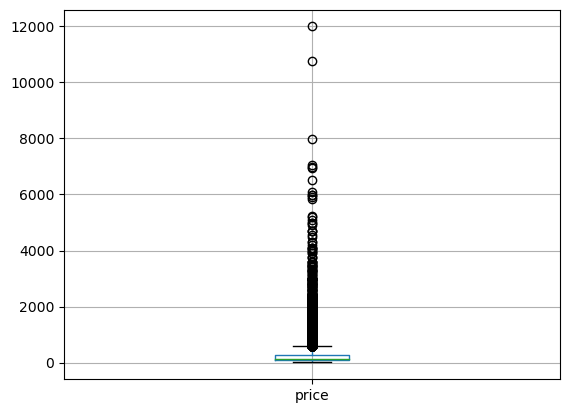

In [3]:
products.boxplot(column=['price'])

In [4]:
products.sort_values(by='price', ascending=False).head(15)

,id,shop,product_id,name,code,category_name,category_code,price
6136,6137,ashan,13403940,"Бренди Torres, Jaime I Испания, 0,7 л + 2 Стакана",torres-30-hayme-i-0-70,алкоголь (самовывоз),alkogol,11999.95
7751,7752,ashan,16016800,"Коньяк «Коктебель» 25 лет Россия, 0,7 л",koktebel-staryy-25-let-0-7,алкоголь (самовывоз),alkogol,10768.99
7679,7680,ashan,6063235,Коньяк Lheraud Vieux Millenaire в подарочной у...,konyak_lero_ve_milliner_07l_43,алкоголь (самовывоз),alkogol,7999.00
7690,7691,ashan,6062554,"Коньяк Remy Martin VSOP Франция, 0,7 л",remi_martin_vsop_konyak07lpu_40,алкоголь (самовывоз),alkogol,7067.99
7673,7674,ashan,8746843,Коньяк Hine Rare в подарочной упаковке Франция...,konyak_hayn_pap_vsop_07l_40,алкоголь (самовывоз),alkogol,6999.00
7648,7649,ashan,10912670,Коньяк ARARAT Двин в подарочной упаковке Армен...,konyak-ararat-dvin-p-u-0-7,алкоголь (самовывоз),alkogol,6947.99
6079,6080,ashan,12801143,"Аперитив Aperol Aperitivo Италия, 3 л",spirt-napitok-aperol-11-3l,алкоголь (самовывоз),alkogol,6499.95
7647,7648,ashan,15701531,"Коньяк ARARAT Васпуракан Армения, 0,7 л",konyak-ararat-vaspurakan-0-7,алкоголь (самовывоз),alkogol,6092.99
423,424,perekrestok,40091,Икра нерки зернистая,ikra-nerki-zernistaa,готовимся к праздникам,gotovimsa-k-prazdnikam,5999.00
7656,7657,ashan,11682659,Коньяк Camus V. S. O. P в подарочной упаковке ...,konyak-kamyu-vsop-0-7-p-u-40,алкоголь (самовывоз),alkogol,5998.99


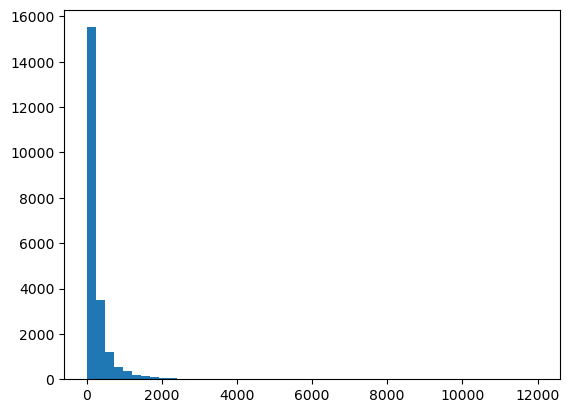

In [5]:
data = products['price']
plt.hist(data, bins=50)
plt.show()

In [6]:
products['price'].describe()

count    21769.000000
mean       261.487882
std        412.358708
min          1.590000
25%         74.990000
50%        139.900000
75%        279.000000
max      11999.950000
Name: price, dtype: float64

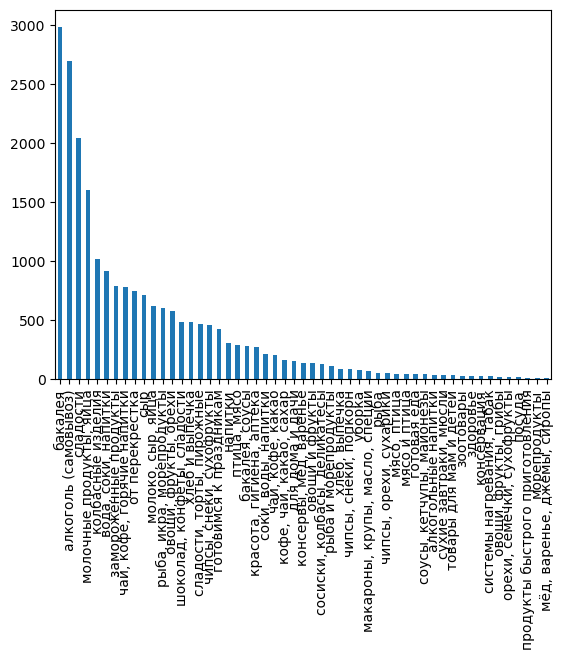

In [7]:
products['category_name'].value_counts().plot.bar()
plt.show()

In [8]:
products['general_category'] = np.nan

def general_category(row):
    if 'молоко' in row['category_name'] or 'молочные' in row['category_name'] or 'сыр' in row['category_name'] or 'яйца' in row['category_name']:
        return 'Молочные продукты'
    elif 'мясные' in row['category_name'] or 'колбасные' in row['category_name']  or 'мясо' in row['category_name'] or 'сосиски' in row['category_name']:
        return 'Мясные продукты'
    elif 'рыба' in row['category_name']:
        return 'Рыба и морепродукты'
    elif 'овощи' in row['category_name'] or 'фрукты' in row['category_name'] or 'орехи' in row['category_name'] or 'снеки' in row['category_name']:
        return 'Овощи, фрукты, закуски'
    elif 'бакалея' in row['category_name'] or 'соусы' in row['category_name'] or 'макароны' in row['category_name'] or 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
        return 'Бакалея и соусы'
    elif 'сладости' in row['category_name']:
        return 'Сладости'
    # elif 'консервы' in row['category_name'] or 'мед' in row['category_name'] or 'варенье' in row['category_name']:
    #     return 'Консервы, мед, варенье'
    elif 'выпечка' in row['category_name'] or 'хлеб' in row['category_name']:
        return 'Выпечка и хлеб'
    elif 'чай' in row['category_name'] or 'кофе' in row['category_name'] or 'сахар' in row['category_name']:
        return 'Чай, кофе, какао, сахар'
    elif 'напитки' in row['category_name'] or 'алкоголь' in row['category_name']:
        return 'Напитки'
    else:
        return 'Прочее'

products['general_category'] = products.apply(general_category, axis=1)
products.general_category = products.general_category.astype('category')
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category
1531,1532,perekrestok,60829,Сухарики Три корочки ржаные со вкусом томата с...,suhariki-tri-korocki-rzanye-so-vkusom-tomata-s...,"чипсы, снеки, попкорн",cipsy-sneki-popkorn,18.99,"Овощи, фрукты, закуски"
3683,3684,magnit,1000459713,Яйцо куриное Магнит Деревенька Деревенское С1 ...,yaytso-kurinoye-magnit-derevenka-derevenskoye-...,"молоко, сыр, яйца",moloko-syr-yaytsa,74.99,Молочные продукты
499,500,perekrestok,6388,Смесь овощная Овощи для жарки быстрозамороженн...,smes-ovosnaa-ovosi-dla-zarki-bystrozamorozenna...,от перекрёстка,ot-perekrestka,114.99,Прочее
380,381,perekrestok,407830,"Конфеты Elit 1924 Ассорти шоколадные, 256г",konfety-elit-1924-assorti-sokoladnye-256g,готовимся к праздникам,gotovimsa-k-prazdnikam,1149.00,Прочее
20552,20553,ashan,134304,"Напиток чайный Greenfield Summer Bouquet, 25x2 г",chay-greenfield-summer-bouquet-chernyy-50-g,"чай, кофе, горячие напитки",chay-kofe-sladosti,164.49,"Чай, кофе, какао, сахар"
886,887,perekrestok,48540,Вафли Венские со взбитыми сливками и вишней Bo...,vafli-venskie-so-vzbitymi-slivkami-i-visnej-bo...,от перекрёстка,ot-perekrestka,79.99,Прочее
6932,6933,ashan,17460952,"Виски Choice Apple Россия, 0,5 л",your-choice-apple-0-5l,алкоголь (самовывоз),alkogol,429.00,Напитки
2189,2190,perekrestok,48267,"Энергетический напиток Red Bull Ред Булл, 355мл",energeticeskij-napitok-red-bull-red-bull-355ml,"соки, воды, напитки",soki-vody-napitki,149.99,Напитки
21481,21482,ashan,16580481,"Напиток сокосодержащий «Фрутмотив» апельсин, 5...",frutmotiv-apelsin-0-5l,"вода, соки, напитки",voda-soki-napitki,62.99,Напитки
17979,17980,ashan,135629,Кисель быстрого приготовления HAAS Моментальны...,kisel-haas-momentalnyy-so-vkusom-vishni-30-g,бакалея,bakaleya,23.99,Бакалея и соусы


In [9]:
products.category_name = products.category_name.astype('category')
products.category_code = products.category_code.astype('category')
products.general_category = products.general_category.astype('category')
products.dtypes

id                     int64
shop                  object
product_id             int64
name                  object
code                  object
category_name       category
category_code       category
price                float64
general_category    category
dtype: object

In [10]:
def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

products['clear_category']=products['category_name'].apply(preprocess_text)
products.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,general_category,clear_category
16715,16716,ashan,18399945,"Мини-рулеты «Контек» с маковой начинкой, 400 г",rulet-s-makom-400-gr,сладости,konditerskie_izdeliya,159.99,Сладости,сладости
9254,9255,ashan,552095,"Напиток овсяный Nemoloko ваниль 3,2%, 1 л",napitok-ovsyanyy-nemoloko-vanil-3-2-1-l,"молочные продукты, яйца",moloko-syr-yayca,123.99,Молочные продукты,молочные продукты яйца
8897,8898,ashan,14228766,Молоко сгущенное АШАН Красная птица с сахаром ...,kp-sgushchen-varenaya-370g-zhb-bzmzh,"молочные продукты, яйца",moloko-syr-yayca,119.99,Молочные продукты,молочные продукты яйца
9618,9619,ashan,7883240,"Сметана «ЭкоНива» 15%, 300 г",smetana_15_en_300g,"молочные продукты, яйца",moloko-syr-yayca,72.96,Молочные продукты,молочные продукты яйца
5351,5352,magnit,1524200026,Чай черный Greenfield Kenyan Sunrise 25пак,chay-cherny-greenfield-kenyan-sunrise-25pak,"чай, кофе, какао",chay-kofe-kakao,129.99,"Чай, кофе, какао, сахар",чай кофе какао
19265,19266,ashan,130460,"Рис «Националь» Premium Басмати длиннозерный, ...",ris-nacional-basmati-dlinnozernyy-500-g,бакалея,bakaleya,167.99,Бакалея и соусы,бакалея
6870,6871,ashan,5765005,Вино «Монастырская трапеза» столовое красное п...,vino_montrapezakrpsl_1l,алкоголь (самовывоз),alkogol,260.99,Напитки,алкоголь самовывоз
12223,12224,ashan,137077,Колбаса полукопченая «ЭКОЛЬ» Говяжья Халяль ми...,kolbasa-polukopchenaya-ekol-govyazhya-halyal-m...,колбасные изделия,kolbasnye-izdeliya,225.99,Мясные продукты,колбасные изделия
13213,13214,ashan,14369720,"Чипсы «Русская картошка» Курица гриль, 200 г",russkaya-kartoshka-kur-gril-200g,"чипсы, снеки, сухофрукты",orehi-suhofrukty-sneki,143.99,"Овощи, фрукты, закуски",чипсы снеки сухофрукты
12109,12110,ashan,102091,Паштет из птичьей печени «Егорьевская КГФ» Фуа...,pashtet-egorevskaya-kgf-fua-gra-iz-ptichey-pec...,колбасные изделия,kolbasnye-izdeliya,163.99,Мясные продукты,колбасные изделия


In [11]:
x = products.clear_category
y = products.general_category
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:', text_clf.score(X_test, y_test))

Score: 0.9995824053452116


In [12]:
joblib.dump(text_clf, 'model_category.pkl')

['model_category.pkl']

In [13]:
c = sqlite3.connect('prods.db')
pr = pd.read_sql("SELECT * FROM products", c)

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price
2117,2118,perekrestok,45889,Вода Боржоми минеральная лечебно-столовая гази...,voda-borzomi-mineralnaa-lecebno-stolovaa-gazir...,"Соки, воды, напитки",soki-vody-napitki,83.99
9030,9031,ashan,18690792,"Творог АШАН Красная птица пластовой 9% БЗМЖ, 2...",kp-tvorog-plast-9-250g-bzmzh,"Молочные продукты, яйца",moloko-syr-yayca,114.99
8545,8546,ashan,11682692,"Ром Bayou Reserve США, 0,7 л",rom-bayyu-rezerv-0-7-l,Алкоголь (самовывоз),alkogol,2599.00
9270,9271,ashan,100730,"Коктейль молочный «Чудо» шоколад 3% БЗМЖ, 200 мл",kokteyl-molochnyy-chudo-shokolad-3-200-g,"Молочные продукты, яйца",moloko-syr-yayca,54.96
21735,21736,ashan,129502,"Нектар банановый Santal, 1 л",nektar-santal-bananovyy-1-l,"Вода, соки, напитки",voda-soki-napitki,176.99
9232,9233,ashan,8256723,"Молоко ультрапастеризованное «Каждый День» 2,5...",kd_moloko_upast_25_970ml,"Молочные продукты, яйца",moloko-syr-yayca,58.99
14429,14430,ashan,17338279,Вобла вяленая «Иду с рыбалки» боковина с перце...,vobla-vyal-bok-s-percem-50g,"Рыба, икра, морепродукты",ryba-ikra-moreprodukty,169.99
17591,17592,ashan,14024921,Готовый завтрак Unicorn Подушечки с фруктовым ...,zavtrak-got-200gr-podush-s-fr-vkus,Бакалея,bakaleya,218.99
13153,13154,ashan,234666,Сухарики ржаные «3 Корочки» со вкусом холодца ...,suhariki-rzhanye-tri-korochki-so-vkusom-holodc...,"Чипсы, снеки, сухофрукты",orehi-suhofrukty-sneki,14.99
18588,18589,ashan,11128043,"Мука MAKFA льняная, 500 г",makfa-muka-lnyanaya-500g,Бакалея,bakaleya,79.90


In [14]:
with open('model_category.pkl', 'rb') as f:
    clf2 = joblib.load(f)

def preprocess_text(input_string):
    clear_string = input_string.translate(str.maketrans('', '', string.punctuation + string.digits))
    clear_string = clear_string.lower()
    return clear_string

pr['clear_category'] = pr['category_name'].apply(preprocess_text)

prediction = clf2.predict(pr['clear_category'])
pr['general_category'] = prediction

pr.sample(10)

,id,shop,product_id,name,code,category_name,category_code,price,clear_category,general_category
10154,10155,ashan,133418,"Биолакт детский «ФрутоНяня» яблоко 2,9%, 200 мл",biolakt-detskiy-frutonyanya-yabloko-2-9-200-ml,"Молочные продукты, яйца",moloko-syr-yayca,42.99,молочные продукты яйца,Молочные продукты
14046,14047,ashan,567769,Креветки «Бухта Изобилия» очищенные королевски...,krevetki-buhta-izobiliya-ochishchennye-korolev...,"Рыба, икра, морепродукты",ryba-ikra-moreprodukty,911.99,рыба икра морепродукты,Рыба и морепродукты
9744,9745,ashan,100935,Сливки стерилизованные «Домик в деревне» 20% Б...,slivki-sterilizovannye-domik-v-derevne-20-200-ml,"Молочные продукты, яйца",moloko-syr-yayca,89.96,молочные продукты яйца,Молочные продукты
15131,15132,ashan,138300,"Конфеты «Комильфо» шоколадные с фисташкой, 232 г",konfety-komilfo-shokoladnye-s-fistashkoy-232-g,Сладости,konditerskie_izdeliya,549.00,сладости,Сладости
19982,19983,ashan,13106321,"Хлопья овсяные «Passim» Геркулес 12 месяцев, 4...",passim-krupa-gerkules-400g,Бакалея,bakaleya,47.99,бакалея,Бакалея и соусы
18989,18990,ashan,13634842,Печень трески «Каждый день» атлантической по-м...,kd-pechen-treski-po-murm-240g,Бакалея,bakaleya,67.99,бакалея,Бакалея и соусы
21227,21228,ashan,8256687,"Вода минеральная «Набеглави», 1 л",voda_mineral_nabeglavi_1l_pet,"Вода, соки, напитки",voda-soki-napitki,119.99,вода соки напитки,Напитки
20662,20663,ashan,3924909,"Кофе молотый «Жокей» По-восточному, 450 г",kofe-molotyy-zhokey-po-vostochnomu-450-g,"Чай, кофе, горячие напитки",chay-kofe-sladosti,709.99,чай кофе горячие напитки,"Чай, кофе, какао, сахар"
2807,2808,perekrestok,7812,"Кукуруза Bonduelle Classique сладкая, 340г",kukuruza-bonduelle-classique-sladkaa-340g,Консервация,konservacia,134.99,консервация,Прочее
14677,14678,ashan,8256644,"Булочка повышенной калорийности «Каждый день»,...",kdbulochka_povysh_kal_ti80g,Хлеб и выпечка,hlebnaya-vypechka,16.99,хлеб и выпечка,Выпечка и хлеб


In [ ]:
# top_10 = pr.sort_values(by='price', ascending=False).head(10)
# sns.set_style('darkgrid')
# plt.figure(figsize=(7,5))
# sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
# plt.title('10 САМЫХ ДОРОГИХ ПРОДУКТОВ', fontsize=22)
# plt.xlabel('Стоимость', fontsize=16)
# plt.ylabel('Наименование', fontsize=16)
# plt.tick_params(axis='x', labelsize=10)
# plt.tick_params(axis='y', labelsize=10)
# plt.show()
#plt.savefig('top_10_max.png', bbox_inches = 'tight')

In [ ]:
# top_10 = pr.sort_values(by='price', ascending=True).head(10)
# sns.set_style('darkgrid')
# plt.figure(figsize=(7,5))
# sns.barplot(x = 'price', y = 'name', data = top_10, palette='rocket')
# plt.title('10 САМЫХ ДЕШЕВЫХ ПРОДУКТОВ', fontsize=22)
# plt.xlabel('Стоимость', fontsize=16)
# plt.ylabel('Наименование', fontsize=16)
# plt.tick_params(axis='x', labelsize=10)
# plt.tick_params(axis='y', labelsize=10)
# plt.show()

In [ ]:
# conditions = [(pr['shop'] == 'ashan'), (pr['shop'] == 'magnit'), (pr['shop'] == 'perekrestok')]
# values = ['Ашан', 'Магнит', 'Перекресток']
# pr['shop_rus'] = np.select(conditions, values)
# pr.shop_rus = pr.shop_rus.astype('category')

# plt.figure(figsize=(10,5))
# pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc='mean')
# plt.title('ТЕПЛОВАЯ КАРТА СРЕДНЕЙ СТОИМОСТИ ТОВАРОВ', fontsize=20)
# sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
# plt.xlabel('Магазин', fontsize=16)
# plt.ylabel('Категория', fontsize=16)
# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)
# plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
# pivot_table = pr.pivot_table(index='general_category', columns='shop_rus', values='price', aggfunc=lambda x: x.mode().max())
# plt.title('ТЕПЛОВАЯ КАРТА МОДЫ СТОИМОСТИ ТОВАРОВ', fontsize=20)
# sns.heatmap(pivot_table, cmap='rocket', annot=True, fmt=".1f")
# plt.xlabel('Магазин', fontsize=16)
# plt.ylabel('Категория', fontsize=16)
# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)
# plt.show()